# Import Libraries
Let's import some libraries to get started!

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline

import xgboost
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import time
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Lode the Dataset

In [2]:
train_df = pd.read_csv('train (1).csv')
test_df = pd.read_csv('test.csv')
combine = [train_df,test_df]

# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

In [ ]:
check the dimension of dataset

In [3]:
print(train_df.shape)
print(test_df.shape)

#total passengers===1309 in dataset

(891, 12)
(418, 11)


In [ ]:
preview dataset

In [ ]:
train_df.head()

#### check the types of features in the Dataset

In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
preview dataset

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [7]:
Seven features are integer or floats. Six in case of test dataset.
Five features are strings (object).


Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
Continous: Age, Fare. Discrete: SibSp, Parch.
traget variabel(response variable)----- survived







#### check the Null values in the Dataset

there are null values present from above analysis 

In [8]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
#in train set--order of null values----- Cabin>Age>Embarked

In [10]:
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [11]:
#in test set order of null values---- Cabin> Age

#### Analyze by describing data(numerica data description)

In [12]:
#numerica data description
train_df.describe(percentiles=[.1, .2, .3, .4, .5, .6,.65, .7,.75, .8, .9,.95,.98, .99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,31.800000,0.000000,0.000000,21.679200


In [13]:
print(train_df['Survived'].value_counts())
#%of survived
j = train_df['Survived'].value_counts()
p  = j[1]*100/(j[0]+ j[1])
print('percentage of survied in train data set is', p,"%")

0    549
1    342
Name: Survived, dtype: int64
percentage of survied in train data set is 38.38383838383838 %


In [14]:
print(train_df['Sex'].value_counts())
#%of survived
j = train_df['Sex'].value_counts()
p  = j[0]*100/(j[0]+ j[1])
print('percentage of male in train data set is', p,"%")

male      577
female    314
Name: Sex, dtype: int64
percentage of male in train data set is 64.75869809203142 %


In [15]:
#Most passengers (> 75%) did not travel with parents or children
print(train_df.SibSp.value_counts())

j = train_df['SibSp'].value_counts()
p  = j[0]*100/len(train_df.SibSp)
print('percentage of passenger without siblings in train data set is', p,"%")

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
percentage of passenger without siblings in train data set is 68.23793490460157 %


In [16]:

print(train_df.Parch.value_counts())

j = train_df['Parch'].value_counts()
p  = j[0]*100/len(train_df.SibSp)
print('percentage of passenger without parents in train data set is', p,"%")

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
percentage of passenger without parents in train data set is 76.0942760942761 %


In [17]:
print(train_df.SibSp.value_counts())

j = train_df['SibSp'].value_counts()
p  = j[0]*100/len(train_df.SibSp)
print('percentage of passenger without siblings in train data set is', p,"%")

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
percentage of passenger without siblings in train data set is 68.23793490460157 %


In [18]:
print(train_df.Pclass.value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


#### Analyze by describing data(categorical data description)

In [19]:
#categorical features analysis

In [20]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [21]:
train_df.groupby('Pclass')['Survived'].mean().sort_values(ascending = False)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass'>

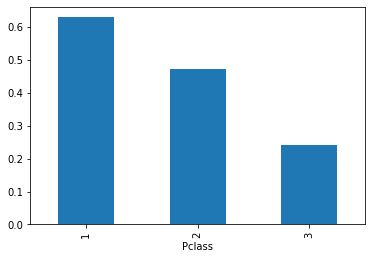

In [22]:
train_df.groupby('Pclass')['Survived'].mean().sort_values(ascending = False).plot(kind = 'bar')

In [23]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [24]:
train_df.groupby('Sex')['Survived'].mean().sort_values(ascending = False)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex'>

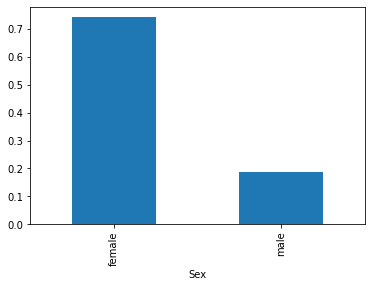

In [25]:
train_df.groupby('Sex')['Survived'].mean().sort_values(ascending = False).plot(kind = 'bar')

In [26]:
train_df.groupby('SibSp')['Survived'].mean().sort_values(ascending = False)

SibSp
1    0.535885
2    0.464286
0    0.345395
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='SibSp'>

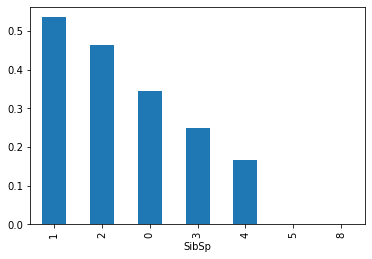

In [27]:
train_df.groupby('SibSp')['Survived'].mean().sort_values(ascending = False).plot(kind='bar')

In [28]:

train_df.groupby('Parch')['Survived'].mean().sort_values(ascending = False)

Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
4    0.000000
6    0.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Parch'>

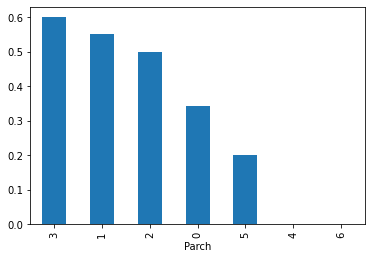

In [29]:
train_df.groupby('Parch')['Survived'].mean().sort_values(ascending = False).plot(kind='bar')

In [30]:
train_df.groupby('Embarked')['Survived'].mean().sort_values(ascending = False)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [31]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
#Ticket feature has high ratio (22%) of duplicate values (unique=681).

print(len(train_df['Ticket'].unique()))
len(train_df['Ticket'].unique())*100/len(train_df.Ticket)

681


76.43097643097643

In [33]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# visualisation

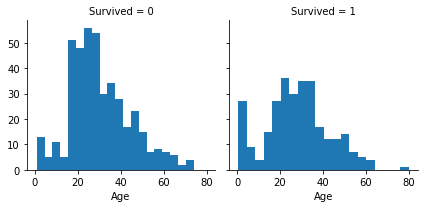

In [35]:
g = sns.FacetGrid(train_df, col= 'Survived')
g.map(plt.hist, 'Age', bins=20)

In [36]:
train_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


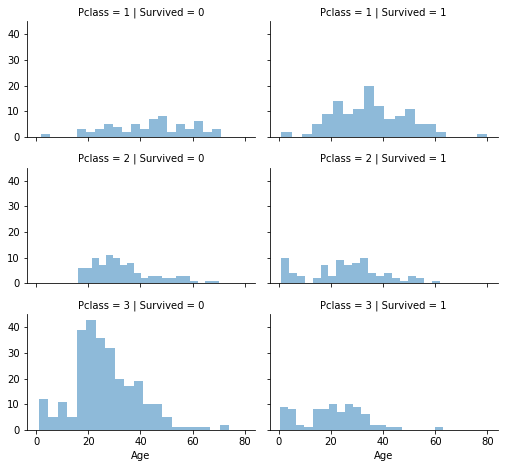

In [37]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


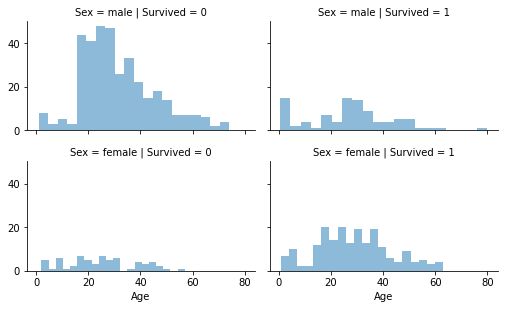

In [38]:
grid = sns.FacetGrid(train_df, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


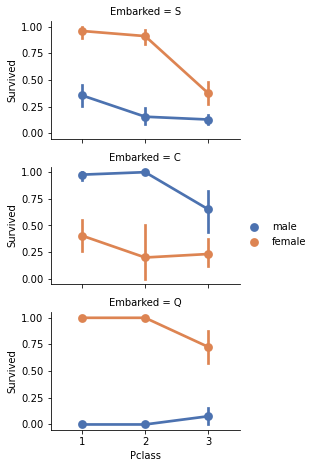

In [39]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


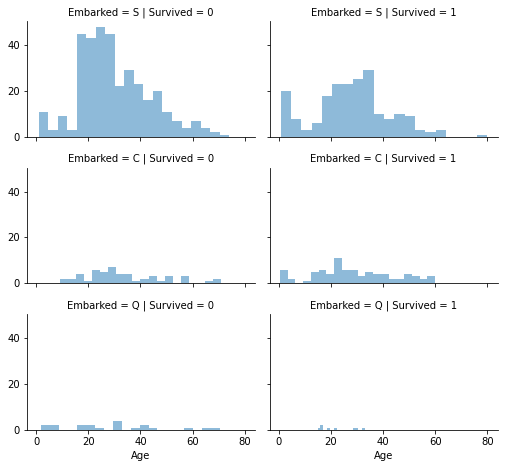

In [40]:
grid = sns.FacetGrid(train_df, col='Survived', row='Embarked', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

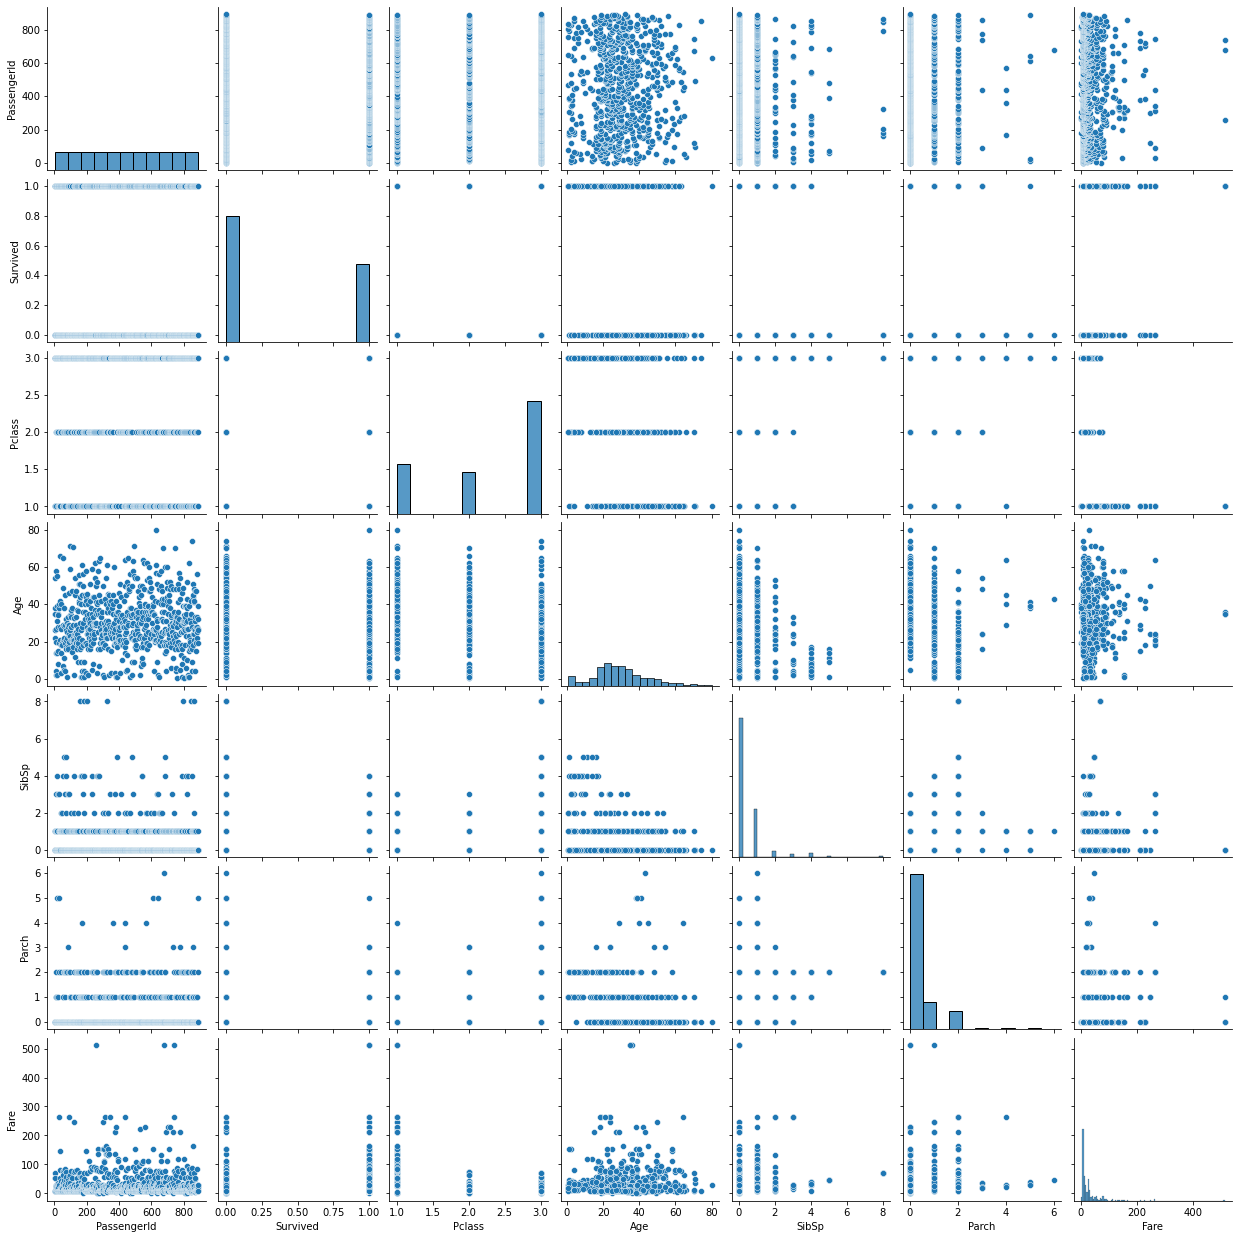

In [41]:
sns.pairplot(train_df)

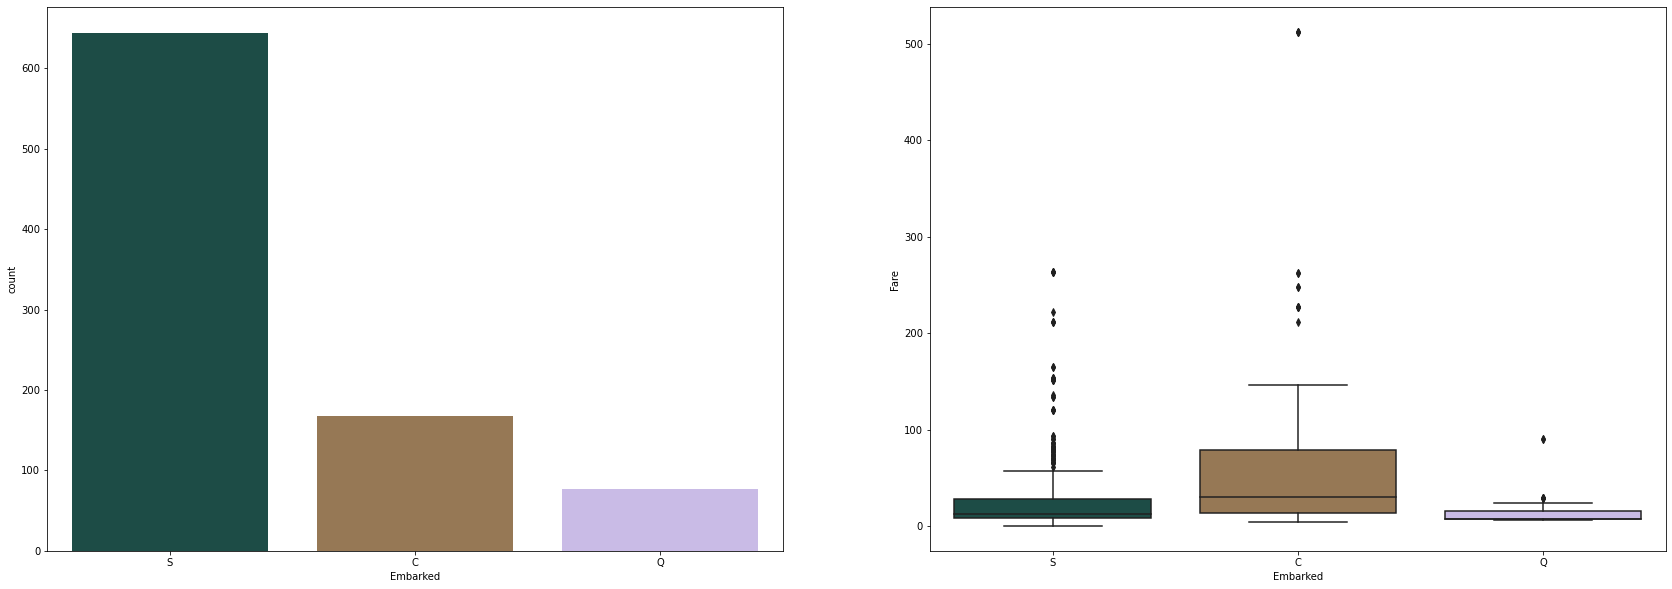

In [42]:
df = train_df.copy()

plt.figure(figsize=(29,10))
plt.subplot(1,2,1)
sns.countplot(x = df.Embarked, palette=("cubehelix"))
plt.subplot(1,2,2)
sns.boxplot(x = df.Embarked, y = df.Fare,palette=("cubehelix"))
plt.show()


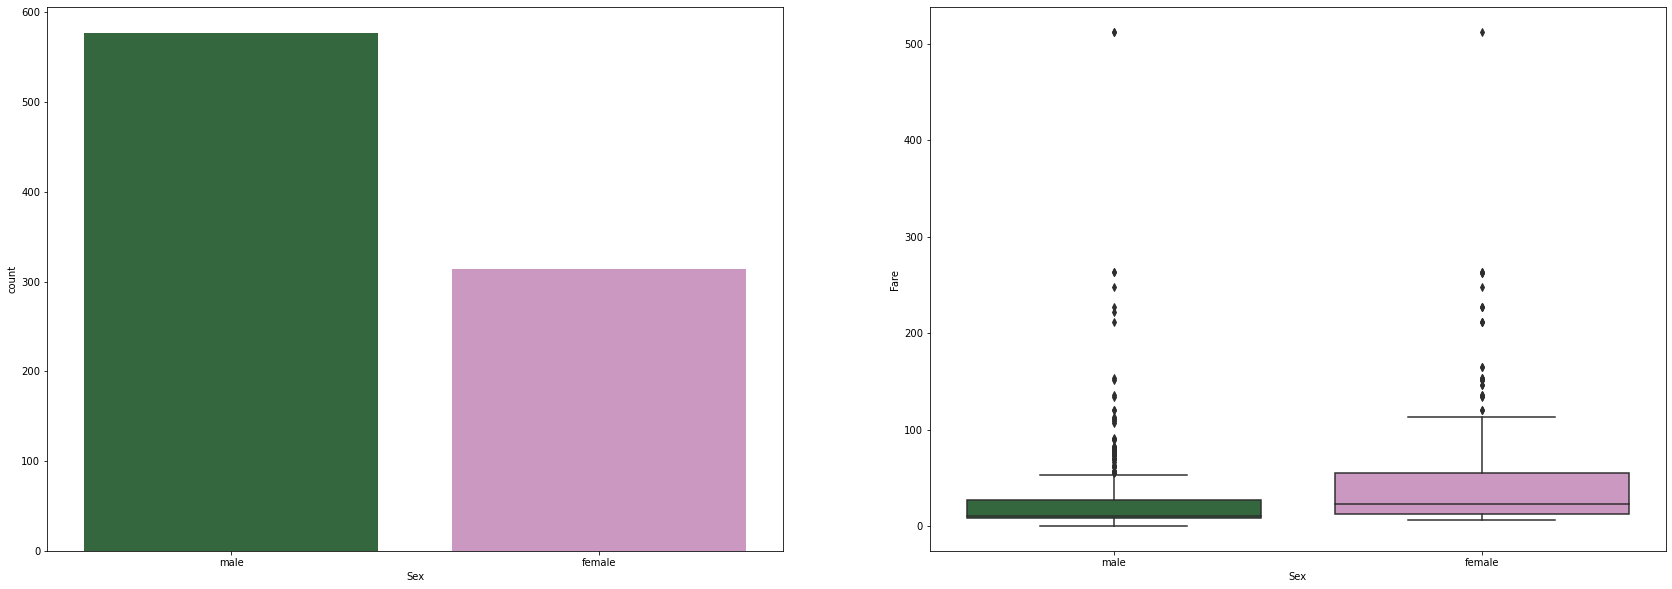

In [43]:
plt.figure(figsize=(29,10))
plt.subplot(1,2,1)
sns.countplot(x = df.Sex, palette=("cubehelix"))
plt.subplot(1,2,2)
sns.boxplot(x = df.Sex, y = df.Fare,palette=("cubehelix"))
plt.show()


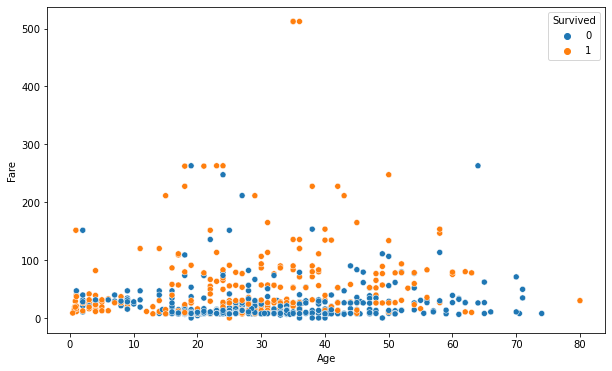

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age', y = 'Fare',hue = "Survived" ,data = df)
plt.show()

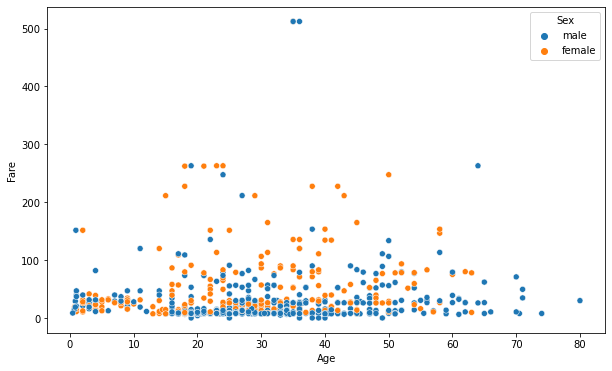

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age', y = 'Fare',hue = "Sex" ,data = df)
plt.show()

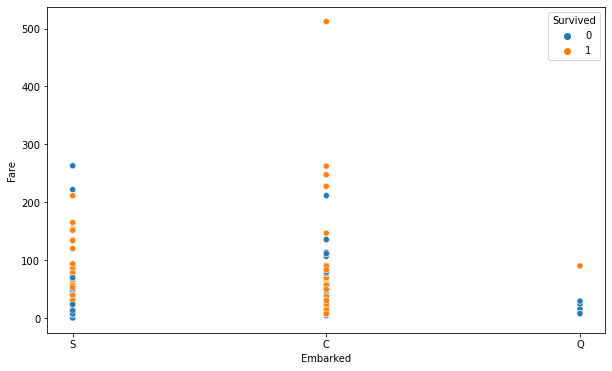

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Embarked', y = 'Fare',hue = "Survived" ,data = df)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


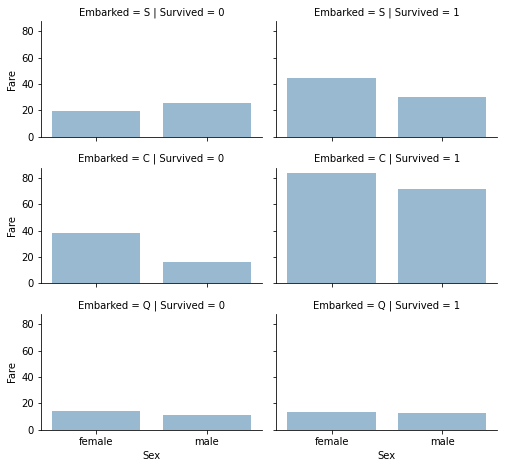

In [47]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

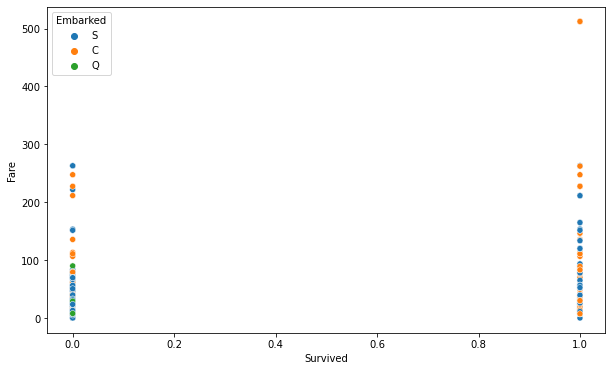

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Survived', y = 'Fare',hue = "Embarked" ,data = df)
plt.show()

#### Droping Some Features

In [49]:
#drop cabin and ticket

In [50]:
print("before", train_df.shape, test_df.shape)
train_df.drop(['Cabin','Ticket'], axis = 1, inplace =True)
test_df.drop(['Cabin','Ticket'], axis = 1, inplace =True)
combine = [train_df, test_df]

before (891, 12) (418, 11)


In [51]:
print("after",train_df.shape, test_df.shape )

after (891, 10) (418, 9)


# Creating new feature extracting from existing

In [52]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [53]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [54]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [55]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for i in combine:
    i['Title'] = i['Title'].map(title_mapping)
    i['Title'] = i['Title'].fillna(0)

In [56]:
train_df['Title']

0      1
1      3
2      2
3      3
4      1
      ..
886    5
887    2
888    2
889    1
890    1
Name: Title, Length: 891, dtype: int64

In [57]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

# Converting a categorical feature

In [58]:
for i in combine:
    d={'female': 1, 'male': 0} 
    i['Sex'] = i['Sex'].map(d)

In [59]:
train_df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

# Completing a numerical continuous feature

In [60]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [61]:
train_df.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [62]:
def impute(x):
    if pd.isnull(x['Age']):
        if x['Pclass']==1:
            return 37
        elif x['Pclass']==2:
            return 29
        else:
            return 24
    else:
        return x['Age']

In [63]:
train_df['Age'] = train_df.apply(impute, axis = 1)
test_df['Age'] = test_df.apply(impute, axis = 1)

In [64]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

<AxesSubplot:>

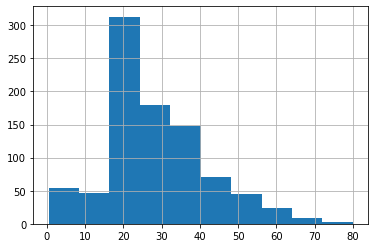

In [65]:
#cutting age in bands
train_df.Age.hist()

In [66]:
train_df['Age']=pd.cut(train_df['Age'], bins = [0,16,32,48,64, np.inf], labels =[0,1,2,3,4])
test_df['Age']=pd.cut(test_df['Age'], bins = [0,16,32,48,64, np.inf], labels =[0,1,2,3,4])

In [67]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [68]:
train_df.groupby('Age')['Survived'].mean()

Age
0    0.550000
1    0.336714
2    0.412844
3    0.434783
4    0.090909
Name: Survived, dtype: float64

# Create new feature combining existing features

In [69]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [70]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [71]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,7.2500,S,1,2,0
1,1,1,1,2,1,0,71.2833,C,3,2,0
2,1,3,1,1,0,0,7.9250,S,2,1,1
3,1,1,1,2,1,0,53.1000,S,3,2,0
4,0,3,0,2,0,0,8.0500,S,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S,5,1,1
887,1,1,1,1,0,0,30.0000,S,2,1,1
888,0,3,1,1,1,2,23.4500,S,2,4,0
889,1,1,0,1,0,0,30.0000,C,1,1,1


In [72]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [73]:
train_df['Age'] = train_df['Age'].apply(lambda x : x).astype(int)
test_df['Age'] = test_df['Age'].apply(lambda x : x).astype(int)

In [74]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [75]:
train_df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
Fare         0
Embarked     2
Title        0
IsAlone      0
Age*Class    0
dtype: int64

# Completing a categorical feature

In [76]:
#replace these 2 nan with most repeated value
train_df.Embarked.dropna().mode()[0]

'S'

# Converting categorical feature to numeric¶

In [77]:
freq_port = train_df.Embarked.dropna().mode()[0]

In [78]:
for i in combine:
    i['Embarked'] = i['Embarked'].fillna(freq_port)

In [79]:
train_df['Embarked'].isnull().sum()

0

In [80]:
train_df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [81]:
for i in combine:
    i['Embarked'] = i['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [82]:
train_df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3


In [83]:
af =train_df.copy()
bf = test_df.copy()

# Quick completing and converting a numeric feature

In [84]:
test_df.Fare.isnull().sum()

1

In [85]:
test_df['Fare'] = test_df['Fare'].fillna(test_df.Fare.dropna().median())

In [86]:
train_df.Fare.isnull().sum()

0

In [87]:
#train_df['Fare'] = train_df['Fare'].fillna(train_df.Fare.dropna().median())

In [88]:
train_df.Fare.isnull().sum()

0

In [89]:
test_df.Fare.isnull().sum()

0

In [90]:
pd.cut(train_df['Fare'], 4).value_counts().sort_index()

(-0.512, 128.082]     853
(128.082, 256.165]     29
(256.165, 384.247]      6
(384.247, 512.329]      3
Name: Fare, dtype: int64

In [91]:
pd.qcut(train_df['Fare'], 4).value_counts().sort_index()

(-0.001, 7.91]     223
(7.91, 14.454]     224
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: Fare, dtype: int64

In [92]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
IsAlone        0
Age*Class      0
dtype: int64

In [93]:
train_df['Fare'] = pd.cut(train_df['Fare'], bins = [-0.33,7.91,14.454,31.0,700.329], labels =[0,1,2,3])
test_df['Fare'] = pd.cut(test_df['Fare'],bins = [-0.33,7.91,14.454,31.0,700.329], labels =[0,1,2,3])

In [94]:
train_df['Fare'] = train_df['Fare'].apply(lambda x:x).astype(int)
test_df['Fare'] = test_df['Fare'].apply(lambda x:x).astype(int)

In [95]:
train_df['Fare']

0      0
1      3
2      1
3      3
4      1
      ..
886    1
887    2
888    2
889    2
890    0
Name: Fare, Length: 891, dtype: int32

In [96]:
train_df.head(4)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2


In [97]:
test_df.head(4)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3


train_df.to_csv('titanic train_df.csv')
test_df.to_csv('titanic test_df.csv')

In [ ]:
train_df.to_csv("train_df", index = None)
test_df.to_csv("test_df", index = None)

In [98]:
id = X_test['PassengerId']
X_test = test_df.drop('PassengerId', axis =1 )


# Model Selectin and Training

In [ ]:
train = train_df.copy()

In [4]:
train.head(30)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


# train test split

In [4]:
#train test split

y_train = train['Survived']
X_train = train.drop(['Survived'], axis = 1)

In [6]:
X_train.Age.value_counts()

1    493
2    218
0    100
3     69
4     11
Name: Age, dtype: int64

In [26]:
X_train.describe()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,1.324355,1.505051,0.361392,1.728395,0.602694,2.769921
std,0.836071,0.477990,0.820565,1.118148,0.635673,1.030039,0.489615,1.753915
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,0.500000,0.000000,1.000000,0.000000,2.000000
50%,3.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,3.000000
75%,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000
max,3.000000,1.000000,4.000000,3.000000,2.000000,5.000000,1.000000,12.000000


In [6]:
#dataset is balanced
y_train.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
#model building
def Classifier_train_modelCV(model, X,y):
    start = time.time()
    
    y_pred = cross_val_predict(model, X, y, cv=5)
    prec = precision_score(y, y_pred)
    recal = recall_score(y, y_pred) 
    f1scor = f1_score(y, y_pred)
    

    try:
        y_scores = cross_val_predict(model, X, y, cv=3,method="decision_function")
    except:   
        y_probas  = cross_val_predict(model,X, y, cv=3,method="predict_proba")
        y_scores = y_probas[:, 1] 
        
    auc = roc_auc_score(y, y_scores)
    AP = metrics.average_precision_score(y, y_scores)
    
    CV_execution_time = time.time()-start
    
    
    
    model_and_predictions_dictionary = {'classification': str(model),
                                        "precision":prec,
                                        "recall(sensity)":recal,
                                        "f1-score": f1scor,
                                        "AUC":auc,
                                        'avg precision':AP,
                                        'CV_execution_time': CV_execution_time,
                                       }
    
    performances = pd.DataFrame([[str(model), np.round(prec, 2),np.round(recal, 2),np.round(f1scor, 2),np.round(auc, 4),np.round(AP, 2), CV_execution_time]], 
                           columns=['ClassificationCV','Precision','Recall','F1score','AUC','Avarage precision','CV_execution_time'])
    
    return model_and_predictions_dictionary, performances
    


    


In [31]:
pipe1 =  KNeighborsClassifier()
pipe2 = SVC(random_state=42)
pipe3 = sklearn.linear_model.LogisticRegression(random_state=42)

In [32]:
classifiers_dictionary={
                        'kneighbour': KNeighborsClassifier(),
                        'SVC': SVC(random_state=42),
                        'SGDClassifier':sklearn.linear_model.SGDClassifier(random_state=42),
                        'Logistic regression':sklearn.linear_model.LogisticRegression(random_state=42), 
                        'Decision tree - unlimited depth':sklearn.tree.DecisionTreeClassifier(random_state=42), 
                        'Random forest': sklearn.ensemble.RandomForestClassifier(random_state=42,n_jobs=-1),
                        'XGBoost':xgboost.XGBClassifier(random_state=42,n_jobs=-1),
                    
                       }



dataframe = pd.DataFrame()
for classifier_name in classifiers_dictionary:
    model_and_predictions_dictionary,performances  = Classifier_train_modelCV(classifiers_dictionary[classifier_name], X_train,y_train)
    dataframe = dataframe.append(performances)


In [33]:
dataframe

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,KNeighborsClassifier(),0.77,0.67,0.71,0.83,0.74,0.358019
0,SVC(random_state=42),0.78,0.71,0.74,0.83,0.81,0.273984
0,SGDClassifier(random_state=42),0.84,0.47,0.60,0.80,0.75,0.078997
0,LogisticRegression(random_state=42),0.77,0.71,0.74,0.85,0.82,0.145946
0,DecisionTreeClassifier(random_state=42),0.76,0.69,0.72,0.81,0.74,0.066976
0,"RandomForestClassifier(n_jobs=-1, random_state...",0.76,0.70,0.73,0.84,0.81,5.475710
0,"XGBClassifier(base_score=None, booster=None, c...",0.76,0.73,0.74,0.85,0.81,1.074940
0,GaussianNB(),0.66,0.75,0.70,0.83,0.77,0.071997
0,Perceptron(random_state=42),0.62,0.84,0.71,0.83,0.77,0.055997


In [42]:
dataframe.sort_values(['AUC'],ascending=False).head(3)

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,LogisticRegression(random_state=42),0.77,0.71,0.74,0.85,0.82,0.145946
0,"XGBClassifier(base_score=None, booster=None, c...",0.76,0.73,0.74,0.85,0.81,1.074940
0,"RandomForestClassifier(n_jobs=-1, random_state...",0.76,0.70,0.73,0.84,0.81,5.475710


In [35]:
dataframe.sort_values([ 'Avarage precision'],ascending=False).head(3)

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,LogisticRegression(random_state=42),0.77,0.71,0.74,0.85,0.82,0.145946
0,SVC(random_state=42),0.78,0.71,0.74,0.83,0.81,0.273984
0,"RandomForestClassifier(n_jobs=-1, random_state...",0.76,0.70,0.73,0.84,0.81,5.475710


In [38]:
#roc

#roc curve
from sklearn.metrics import roc_curve
from sklearn import metrics

def get_values_forROC(model, X,y):   
    y_pred = cross_val_predict(model, X, y, cv=3)
    try:
        y_scores = cross_val_predict(model, X, y, cv=3,method="decision_function")
    except:   
        y_probas  = cross_val_predict(model,X, y, cv=3,method="predict_proba")
        y_scores = y_probas[:, 1] 
        
    
    fpr, tpr, thresholds = roc_curve(y, y_scores)
    return fpr, tpr, thresholds
   

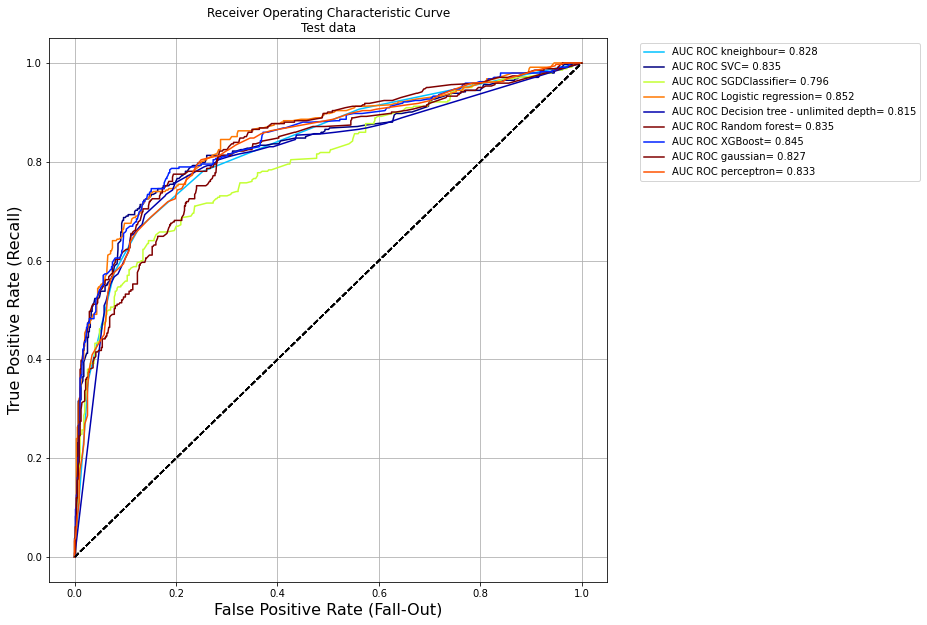

In [40]:
#roc curvre

#%%capture
roc_cur, ax = plt.subplots(1, 1, figsize=(10,10))

cmap = plt.get_cmap('jet')
colors={
        'kneighbour':cmap(80),'SVC':cmap(0),'SGDClassifier':cmap(150),'Logistic regression':cmap(200),  
        'Decision tree - unlimited depth':cmap(10),
        'Random forest':cmap(300), 'XGBoost':cmap(40)}


    
for classifier_name in classifiers_dictionary:
    
    FPR_list, TPR_list, threshold = get_values_forROC(classifiers_dictionary[classifier_name], X_train,y_train)
    ROC_AUC = metrics.auc(FPR_list, TPR_list)

    ax.plot(FPR_list, TPR_list, 'b', color=colors[classifier_name], label = 'AUC ROC {0}= {1:0.3f}'.format(classifier_name,ROC_AUC))
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.title('Receiver Operating Characteristic Curve\nTest data')
    plt.grid(True)

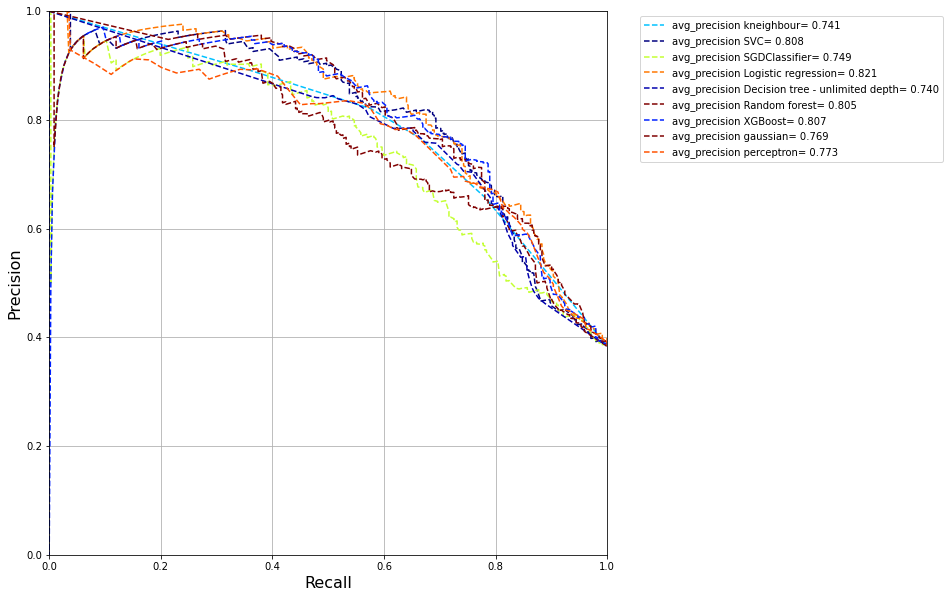

In [41]:

#PR curve


from sklearn.metrics import precision_recall_curve
from sklearn import metrics

def get_values_forPR(model, X,y):   
    y_pred = cross_val_predict(model, X, y, cv=3)
    try:
        y_scores = cross_val_predict(model, X, y, cv=3,method="decision_function")
    except:   
        y_probas  = cross_val_predict(model,X, y, cv=3,method="predict_proba")
        y_scores = y_probas[:, 1] 
    AP = metrics.average_precision_score(y, y_scores)
    
    precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
    return precisions, recalls, thresholds, AP
   

roc_cur, ax = plt.subplots(1, 1, figsize=(10,10))

cmap = plt.get_cmap('jet')
colors={
        'kneighbour':cmap(80),'SVC':cmap(0),'SGDClassifier':cmap(150),'Logistic regression':cmap(200),  
        'Decision tree - unlimited depth':cmap(10),
        'Random forest':cmap(300), 'XGBoost':cmap(40)}

for classifier_name in classifiers_dictionary:
    
    

    precision, recall, threshold, AP=  get_values_forPR(classifiers_dictionary[classifier_name], X_train,y_train)
    precision=precision[::-1]
    recall=recall[::-1]
  
    ax.plot(recall ,precision, "b--", color=colors[classifier_name], label = 'avg_precision {0}= {1:0.3f}'.format(classifier_name,AP))
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

In [43]:
#curves for top 3 classifiers
classifiers_dictionary={
                        
                        'Logistic regression':pipe3,                   
                        'Random forest': sklearn.ensemble.RandomForestClassifier(random_state=42,n_jobs=-1),
                        'XGBoost':xgboost.XGBClassifier(random_state=42,n_jobs=-1),
                        
                       }

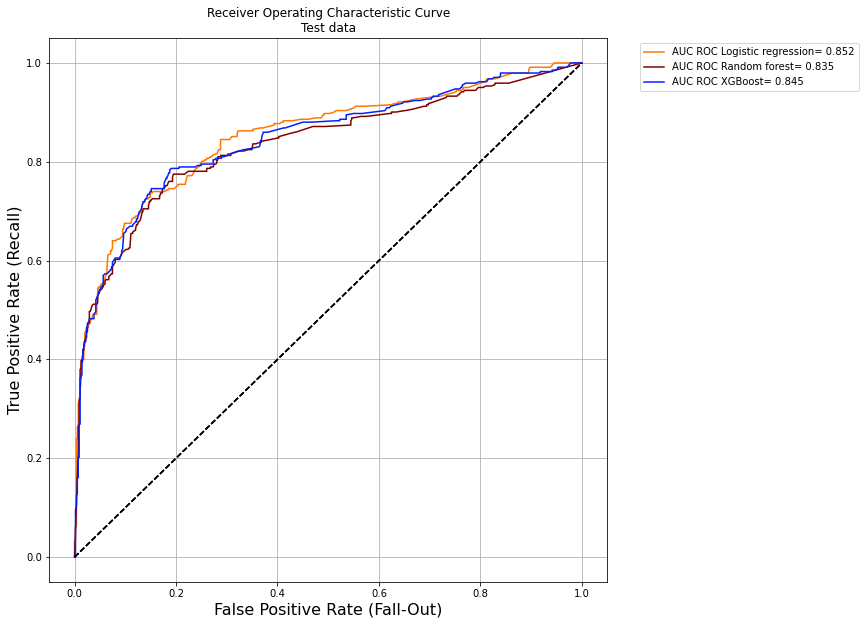

In [44]:
#roc curvre

#%%capture
roc_cur, ax = plt.subplots(1, 1, figsize=(10,10))

cmap = plt.get_cmap('jet')
colors={
       'Logistic regression':cmap(200),  
      
        'Random forest':cmap(300), 'XGBoost':cmap(40),}


    
for classifier_name in classifiers_dictionary:
    
    FPR_list, TPR_list, threshold = get_values_forROC(classifiers_dictionary[classifier_name], X_train,y_train)
    ROC_AUC = metrics.auc(FPR_list, TPR_list)

    ax.plot(FPR_list, TPR_list, 'b', color=colors[classifier_name], label = 'AUC ROC {0}= {1:0.3f}'.format(classifier_name,ROC_AUC))
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.title('Receiver Operating Characteristic Curve\nTest data')
    plt.grid(True)

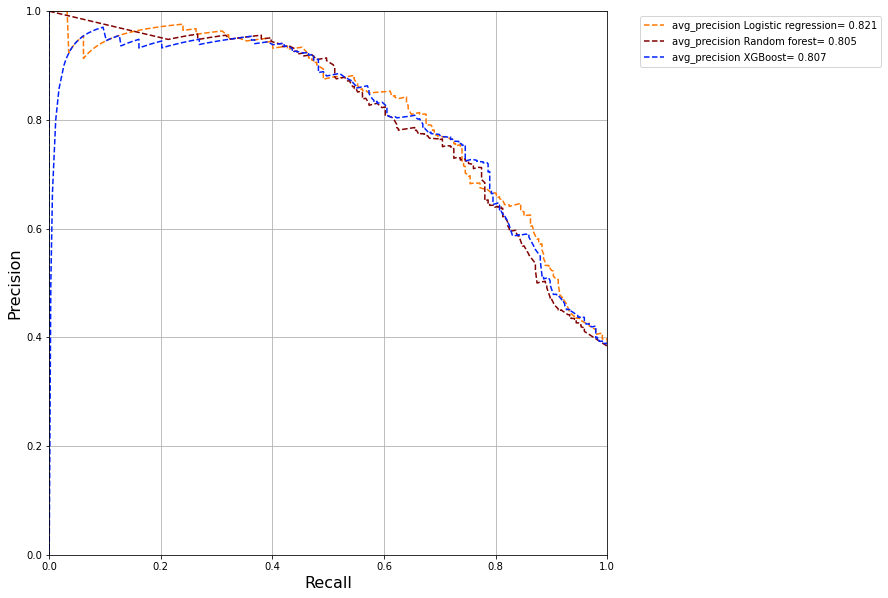

In [45]:

#PR curve


from sklearn.metrics import precision_recall_curve
from sklearn import metrics

def get_values_forPR(model, X,y):   
    y_pred = cross_val_predict(model, X, y, cv=3)
    try:
        y_scores = cross_val_predict(model, X, y, cv=3,method="decision_function")
    except:   
        y_probas  = cross_val_predict(model,X, y, cv=3,method="predict_proba")
        y_scores = y_probas[:, 1] 
    AP = metrics.average_precision_score(y, y_scores)
    
    precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
    return precisions, recalls, thresholds, AP
   

roc_cur, ax = plt.subplots(1, 1, figsize=(10,10))

cmap = plt.get_cmap('jet')
colors={
       'Logistic regression':cmap(200),  
      
        'Random forest':cmap(300), 'XGBoost':cmap(40),}
for classifier_name in classifiers_dictionary:
    
    

    precision, recall, threshold, AP=  get_values_forPR(classifiers_dictionary[classifier_name], X_train,y_train)
    precision=precision[::-1]
    recall=recall[::-1]
  
    ax.plot(recall ,precision, "b--", color=colors[classifier_name], label = 'avg_precision {0}= {1:0.3f}'.format(classifier_name,AP))
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

# hyper parameter tunning for top classifiers

#model selection 
#selected model ==XGBClassifier

# grid search for XGboost

In [70]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid =  {
         'min_child_weight':range(1,6,2),
        'max_depth':range(3,10,2),
        'n_estimators': [50,100,200],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        "learning_rate":[0.05,0.1, 0.2, 0.3 ]
        }
xg = xgboost.XGBClassifier(random_state=42,n_jobs=-1)
grid = GridSearchCV(xg, param_grid, n_jobs=2, scoring= 'roc_auc')
grid.fit(X_train, y_train)
print("best parameters for XGboos", grid.best_params_)
print("best AUC score for XGboost", grid.best_score_)
best_model = grid.best_estimator_
print("best model for Xgboost", best_model)

best parameters for XGboos {'colsample_bytree': 1.0, 'gamma': 2, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
best AUC score for XGboost 0.8767783006156737
best model for Xgboost XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)


In [73]:
print("best AUC score for XGboost", grid.best_score_)

best AUC score for XGboost 0.8767783006156737


In [56]:
import pickle

In [65]:
pickle.dump(best_model, open('titanik.pkl','wb'))

In [66]:
# model evaluation on test set

In [78]:
id = X_test.PassengerId

In [79]:
id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [82]:
X_test.drop("PassengerId",axis =1, inplace = True)

In [83]:
y_pred = best_model.predict(X_test)   

In [84]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [92]:
prediction = pd.DataFrame()
prediction['PassengerId'] = id
prediction['Survived'] = y_pred
prediction.to_csv("gender submission.csv", index =False)

# grid search for Logistic Regression

In [ ]:
#using logistic regression

In [115]:
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(random_state=42)
pipe = Pipeline(steps=[ ("logistic", logistic)])


# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    
    "logistic__C": np.logspace(-4, 4, 4),
    'logistic__solver' : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
    'logistic__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
}

from sklearn.model_selection import RepeatedStratifiedKFold


cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

grid = GridSearchCV(pipe, param_grid, n_jobs=2, scoring= 'roc_auc', cv=cv)
grid.fit(X_train, y_train)

print("best parameters for logisticregression", grid.best_params_)
print("best AUC score for logisticregression", grid.best_score_)
best_model = grid.best_estimator_
print("best model for logisticregression", best_model)

best parameters for logisticregression {'logistic__C': 21.54434690031882, 'logistic__penalty': 'l2', 'logistic__solver': 'saga'}
best AUC score for logisticregression 0.8555162996373079
best model for logisticregression Pipeline(steps=[('logistic',
                 LogisticRegression(C=21.54434690031882, random_state=42,
                                    solver='saga'))])


In [113]:
y_pred = best_model.predict(X_test)

In [114]:
prediction = pd.DataFrame()
prediction['PassengerId'] = id
prediction['Survived'] = y_pred
prediction.to_csv("gender submission2.csv", index =False)

# Random forest

In [117]:
#using random forest
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [123]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring= 'roc_auc', n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [124]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [125]:
grid.best_score_

0.8555162996373079

In [128]:
# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators': [100, 200, 300, 1000],
 'min_samples_split': [3,5,7],
 'min_samples_leaf':[2,3],
 'max_features': [2, 3,4],
 'max_depth':[40,50,60,70],
 'bootstrap': [True]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring= 'roc_auc')
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [40, 50, 60, 70],
                         'max_features': [2, 3, 4], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='roc_auc', verbose=2)

In [129]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 100}

In [ ]:
{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [130]:
grid_search.best_score_

0.8629965167928929

In [131]:
ss = grid_search.best_estimator_

In [140]:
y_pred = ss.predict(X_test)
prediction = pd.DataFrame()
prediction['PassengerId'] = id
prediction['Survived'] = y_pred
prediction.to_csv("gender submission3.csv", index =False)

In [137]:
# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators': [60,100],
 'min_samples_split': [8,10,12],
 'min_samples_leaf':[4,5],
              'max_features': [2],
 'max_depth':[80,90,100],
 'bootstrap': [True]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring= 'roc_auc')
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2], 'min_samples_leaf': [4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [60, 100]},
             scoring='roc_auc', verbose=2)

In [138]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 60}

In [133]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
{'bootstrap': True,
 'max_depth': 70,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 100}

In [134]:
grid_search.best_score_

0.8624692423225641

In [139]:
grid_search.best_score_

0.862293484165788

# Ensambling method

# hard voting classifier
r classifier is to aggregate the predictions of
each classifier and predict the class that gets the most votes. This majority-vote classi‐
fier is called a hard voting classifier

In [10]:
#curves for top 3 classifiers
classifiers_dictionary={
                        
                        'Logistic regression':LogisticRegression(random_state= 42),                   
                        'Random forest': sklearn.ensemble.RandomForestClassifier(random_state=42),
                        'XGBoost':xgboost.XGBClassifier(random_state=42),
                        
                       }

In [21]:
lg = LogisticRegression(random_state= 42)                   
rf = sklearn.ensemble.RandomForestClassifier(random_state=42)
xg = xgboost.XGBClassifier(random_state=42)

In [22]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('lr', lg), ('rf', rf), ('xg', xg)],voting='hard')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42,
                                            reg_alpha=None, reg_lambda=None, ...))])

In [39]:
from sklearn.metrics import roc_auc_score

y_prd = voting_clf.predict(X_train)
voting_clf.score(X_train,y_train)


0.8653198653198653

# soft voting classifier
If all classifiers are able to estimate class probabilities (i.e., they have a pre
dict_proba() method), then you can tell Scikit-Learn to predict the class with the
highest class probability, averaged over all the individual classifiers. This is called so
voting. It often achieves higher performance than hard voting because it gives more
weight to highly confident votes. All you need to do is replace voting="hard" with
voting="soft" 

In [40]:
#soft  voting

voting_clf = VotingClassifier(estimators=[('lr', lg), ('rf', rf), ('xg', xg)],voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_pol...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42,
                                            reg_alpha=None, reg_lambda=None, ...))],
                 voting='soft')

In [42]:
voting_clf.score(X_train,y_train)

0.8597081930415263

In [53]:
y_score= voting_clf.predict_proba(X_train)[:,1]

In [56]:
roc_auc_score(y_train.values,y_score)

0.9207943203485338

In [57]:
from sklearn.model_selection import KFold


In [62]:
 model_and_predictions_dictionary,performances = Classifier_train_modelCV(voting_clf, X_train,y_train)

In [63]:
performances

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,"VotingClassifier(estimators=[('lr', LogisticRe...",0.77,0.7,0.74,0.8585,0.82,4.318747


In [66]:
#using one more
#from  sklearn.ensemble import GradientBoostingClassifier
#gb = GradientBoostingClassifier()

lg = LogisticRegression(C = 21.54434690031882, penalty ='l2', solver = 'saga',random_state= 42)                   
rf = sklearn.ensemble.RandomForestClassifier(bootstrap=True,
 max_depth= 70,
 max_features= 2,
 min_samples_leaf= 3,
 min_samples_split=7,
 n_estimators=100,random_state=42)
xg = xgboost.XGBClassifier(colsample_bytree= 1.0, gamma=2, learning_rate= 0.3, max_depth= 3, min_child_weight= 1, n_estimators=100, subsample=0.8,random_state=42)



voting_clf = VotingClassifier(estimators=[('lr', lg), ('rf', rf), ('xg', xg)],voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=21.54434690031882,
                                                 random_state=42,
                                                 solver='saga')),
                             ('rf',
                              RandomForestClassifier(max_depth=70,
                                                     max_features=2,
                                                     min_samples_leaf=3,
                                                     min_samples_split=7,
                                                     random_state=42)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1.0,...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.3, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42,
                                            reg_alpha=None, reg_lambda=None, ...))],
                 voting='soft')

In [67]:
model_and_predictions_dictionary,performances = Classifier_train_modelCV(voting_clf, X_train,y_train)

In [68]:
performances

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,"VotingClassifier(estimators=[('lr',\n ...",0.8,0.66,0.72,0.8625,0.84,4.352763


In [74]:
y_pred = voting_clf.predict(X_test)
prediction = pd.DataFrame()
prediction['PassengerId'] = id
prediction['Survived'] = y_pred
prediction.to_csv("gender submission5.csv", index =False)

In [75]:
prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [78]:
ss = SVC(random_state=42)

In [79]:
ss.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [87]:
from sklearn.model_selection import RepeatedStratifiedKFold


def grid_search(model , X_train,y_train, param_grid):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=4, random_state=1)

    grid = GridSearchCV(model, param_grid ,cv=cv)
    grid.fit(X_train, y_train)
    
    return grid

In [106]:
param_grid = {'svm__C':[ .001,.01,1.0,10],
                'svm__degree':[2,3,4],
                 'svm__gamma': ['scale', 'auto'],
                 'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 
            }

# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
svm = SVC(random_state=42,probability=True)

pipe = Pipeline(steps=[ ("scaler", scaler),("svm", svm)])

grid_search = grid_search(pipe, X_train,y_train, param_grid = param_grid)

In [109]:
grid_search.best_params_


{'svm__C': 1.0, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}

In [110]:
grid_search.best_score_

0.8232361433682757

In [111]:
svc = grid_search.best_estimator_

In [113]:
svc

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(degree=2, random_state=42))])

In [117]:
svm = SVC(random_state=42,probability=True,degree=2)

pipe = Pipeline(steps=[ ("scaler", scaler),("svm", svm)])
pipe2 = Pipeline(steps=[ ("scaler", scaler),("svm", svm)])

In [118]:
#soft voting again

voting_clf = VotingClassifier(estimators=[('lr', lg), ('rf', rf), ('xg', xg), ('pipe', pipe)],voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=21.54434690031882,
                                                 random_state=42,
                                                 solver='saga')),
                             ('rf',
                              RandomForestClassifier(max_depth=70,
                                                     max_features=2,
                                                     min_samples_leaf=3,
                                                     min_samples_split=7,
                                                     random_state=42)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1.0,...
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42,
                                            reg_alpha=None, reg_lambda=None, ...)),
                             ('pipe',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm',
                                               SVC(degree=2, probability=True,
                                                   random_state=42))]))],
                 voting='soft')

In [119]:
voting_clf.score(X_train,y_train)

y_score= voting_clf.predict_proba(X_train)[:,1]

roc_auc_score(y_train.values,y_score)

0.8995808434261123

In [ ]:
voting_clf

In [120]:
y_pred = voting_clf.predict(X_test)
prediction = pd.DataFrame()
prediction['PassengerId'] = id
prediction['Survived'] = y_pred
prediction.to_csv("gender submission6.csv", index =False)

In [121]:
svm = SVC(random_state=42,probability=True,degree=2)

pipe = Pipeline(steps=[ ("scaler", scaler),("svm", svm)])
pipe2 = Pipeline(steps=[ ("scaler", scaler),("lr", lg)])

#soft voting again

voting_clf = VotingClassifier(estimators=[('pipe2', pipe2), ('rf', rf), ('xg', xg), ('pipe', pipe)],voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('pipe2',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('lr',
                                               LogisticRegression(C=21.54434690031882,
                                                                  random_state=42,
                                                                  solver='saga'))])),
                             ('rf',
                              RandomForestClassifier(max_depth=70,
                                                     max_features=2,
                                                     min_samples_leaf=3,
                                                     min_samples_split=7,
                                                     random_state=42)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_...
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42,
                                            reg_alpha=None, reg_lambda=None, ...)),
                             ('pipe',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm',
                                               SVC(degree=2, probability=True,
                                                   random_state=42))]))],
                 voting='soft')

In [122]:
voting_clf.score(X_train,y_train)

y_score= voting_clf.predict_proba(X_train)[:,1]

roc_auc_score(y_train.values,y_score)

0.8995382353881061

In [124]:
y_pred = voting_clf.predict(X_test)
prediction = pd.DataFrame()
prediction['PassengerId'] = id
prediction['Survived'] = y_pred
prediction.to_csv("gender submission7.csv", index =False)

# Bagging and Pasting
r approach is to use the same training algorithm for every
predictor, but to train them on different random subsets of the training set. When
sampling is performed with replacement, this method is called bagging1
(short for
bootstrap aggregating2
). When sampling is performed without replacement, it is called
pasting.
3

same traiinig instance can be sampled many times------with replacement ----bootstraping =true-----bagging


one time ----- without replacement-----pasting


predictor has a higher bias than if it were trained on the original training set, but
aggregation reduces both bias and variance.4
 Generally, the net result is that the
ensemble has a similar bias but a lower variance than a single predictor trained on the
original training set.

predictors can all be trained in parallel, via d

In [127]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=10,max_samples=100, bootstrap=True, n_jobs=-1)

model_and_predictions_dictionary,performances = Classifier_train_modelCV(bag_clf, X_train,y_train)
performances

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,BaggingClassifier(base_estimator=DecisionTreeC...,0.75,0.69,0.72,0.847,0.81,0.449928


e following code trains an
ensemble of 10 Decision Tree classifiers,5
each trained on 100 training instances ran‐
domly sampled from the training set with replacement (this is an example of bagging,
but if you want to use pasting instead, just set bootstrap=False). 

The n_jobs param‐
eter tells Scikit-Learn the number of CPU cores to use for training and predictions
(–1 tells Scikit-Learn to use all available cores):


In [128]:
#without bagging
model_and_predictions_dictionary,performances = Classifier_train_modelCV(DecisionTreeClassifier(random_state=42), X_train,y_train)
performances

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,DecisionTreeClassifier(random_state=42),0.77,0.66,0.71,0.8147,0.74,0.115041


# Out-of-Bag Evaluation
With bagging, some instances may be sampled several times for any given predictor,
while others may not be sampled at all. By default a BaggingClassifier samples m
training instances with replacement (bootstrap=True), where m is the size of the
training set. This means that only about 63% of the training instances are sampled on
average for each predictor.6


 The remaining 37% of the training instances that are not
sampled are called out-of-bag (oob) instances. Note that they are not the same 37%
for all predictors.


Since a predictor never sees the oob instances during training, it can be evaluated on
these instances, without the need for a separate validation set. You can evaluate the
ensemble itself by averaging out the oob evaluations of each predictor.


In Scikit-Learn, you can set oob_score=True when creating a BaggingClassifier to
request an automatic oob evaluation after training

In [134]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=10,max_samples=100, bootstrap=True,
                             oob_score=True ,n_jobs=-1)

bag_clf.fit(X_train,y_train)
bag_clf.oob_score_
#0.80% accuracy on the test set

0.8069584736251403

In [137]:
score = bag_clf.oob_decision_function_[:,1]
roc_auc_score(y_train, score)

0.8522406501986601

In [144]:
#lets try to do bagging on xgboostclassifier the best model stored than check the prediction on kaggle
import pickle
best_model = pickle.load( open('titanik.pkl','rb'))



bag_clf = BaggingClassifier(best_model, n_estimators=500,max_samples=100, bootstrap=True, n_jobs=-1)

model_and_predictions_dictionary,performances = Classifier_train_modelCV(bag_clf, X_train,y_train)
performances

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,BaggingClassifier(base_estimator=XGBClassifier...,0.77,0.69,0.73,0.856,0.83,342.408728


In [145]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                               callbacks=None,
                                               colsample_bylevel=1,
                                               colsample_bynode=1,
                                               colsample_bytree=1.0,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None, gamma=2,
                                               gpu_id=-1,
                                               grow_policy='depthwise',
                                               importance_type=None,
                                               interaction_constraints='',
                                               learning_rate=0.3, max_bin=256,
                                               max_cat_to_onehot=4,
                                               max_delta_step=0, max_depth=3,
                                               max_leaves=0, min_child_weight=1,
                                               missing=nan,
                                               monotone_constraints='()',
                                               n_estimators=100, n_jobs=0,
                                               num_parallel_tree=1,
                                               predictor='auto',
                                               random_state=42, reg_alpha=0,
                                               reg_lambda=1, ...),
                  max_samples=100, n_estimators=500, n_jobs=-1)

In [150]:
y_pred = bag_clf.predict(X_test)

In [151]:
y_pred = bag_clf.predict(X_test)
prediction = pd.DataFrame()
prediction['PassengerId'] = id
prediction['Survived'] = y_pred
prediction.to_csv("gender submission7.csv", index =False)

In [ ]:
lg = LogisticRegression(C = 21.54434690031882, penalty ='l2', solver = 'saga',random_state= 42)                   
rf = sklearn.ensemble.RandomForestClassifier(bootstrap=True,
 max_depth= 70,
 max_features= 2,
 min_samples_leaf= 3,
 min_samples_split=7,
 n_estimators=100,random_state=42)
xg = xgboost.XGBClassifier(colsample_bytree= 1.0, gamma=2, learning_rate= 0.3, max_depth= 3, min_child_weight= 1, n_estimators=100, subsample=0.8,random_state=42)


In [153]:
#again do xgboost with bagging and out of bag score
xg = xgboost.XGBClassifier(colsample_bytree= 1.0, gamma=2, learning_rate= 0.3, max_depth= 3, min_child_weight= 1, n_estimators=100, subsample=0.8,random_state=42)



bag_clf = BaggingClassifier(xg, n_estimators=500,max_samples=200, bootstrap=True,
                             oob_score=True ,n_jobs=-1)

bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.8047138047138047

In [154]:
score = bag_clf.oob_decision_function_[:,1]
roc_auc_score(y_train, score)

0.8605971516526593

In [155]:
y_pred = bag_clf.predict(X_test)
prediction = pd.DataFrame()
prediction['PassengerId'] = id
prediction['Survived'] = y_pred
prediction.to_csv("gender submission8.csv", index =False)

# Random Patches and Random Subspaces
 supports sampling the features as well. 
    
    
    BaggingClassifier class supports sampling the features as well. This is con‐
trolled by two hyperparameters: max_features and bootstrap_features. They work
the same way as max_samples and bootstrap, but for feature sampling instead of
instance sampling. Thus, each predictor will be trained on a random subset of the
input features.

Random
Patches method.
This is particularly useful when you are dealing with high-dimensional inputs (such
as images). Sampling both training instances and features is called the Random
Patches method.
7

Random Subspaces method.
 Keeping all training instances (i.e., bootstrap=False and max_sam
ples=1.0) but sampling features (i.e., bootstrap_features=True and/or max_fea
tures smaller than 1.0) is called the Random Subspaces method.
8

Sampling features results in even more predictor diversity, trading a bit more bias for
a lower variance.

In [157]:
#Random Patches method

xg = xgboost.XGBClassifier(colsample_bytree= 1.0, gamma=2, learning_rate= 0.3, max_depth= 3, min_child_weight= 1, n_estimators=100, subsample=0.8,random_state=42)



bag_clf11 = BaggingClassifier(xg, n_estimators=500,max_samples=200, bootstrap=True,
                             oob_score=True ,n_jobs=-1,bootstrap_features=True)

model_and_predictions_dictionary,performances = Classifier_train_modelCV(bag_clf11, X_train,y_train)
performances

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,BaggingClassifier(base_estimator=XGBClassifier...,0.79,0.68,0.73,0.8574,0.84,366.296502


In [159]:
bag_clf11.fit(X_train, y_train)

BaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=1.0,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None, gamma=2,
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.3, max_bin=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=3,
                                               max_leaves=None,
                                               min_child_weight=1, missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               predictor=None, random_state=42,
                                               reg_alpha=None, reg_lambda=None, ...),
                  bootstrap_features=True, max_samples=200, n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [160]:
bag_clf11.oob_score_

0.8013468013468014

In [161]:
score = bag_clf11.oob_decision_function_[:,1]
roc_auc_score(y_train, score)

0.8561179816572395

In [162]:
y_pred = bag_clf.predict(X_test)
prediction = pd.DataFrame()
prediction['PassengerId'] = id
prediction['Survived'] = y_pred
prediction.to_csv("gender submission9.csv", index =False)

# Random Forests
As we have discussed, a Random Forest9
 is an ensemble of Decision Trees, generally
trained via the bagging method (or sometimes pasting), typically with max_samples
set to the size of the training set. Instead of building a BaggingClassifier and pass‐
ing it a DecisionTreeClassifier, you can instead use the RandomForestClassifier
class, which is more convenient and optimized for Decision Trees10 (similarly, there is
a RandomForestRegressor class for regression tasks). The following code trains a
Random Forest classifier with 500 trees (each limited to maximum 16 nodes), using
all available CPU cores:
    


In [175]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, oob_score=True)

model_and_predictions_dictionary,performances = Classifier_train_modelCV(er, X_train,y_train)
performances

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,"ExtraTreesClassifier(bootstrap=True, max_leaf_...",0.81,0.67,0.73,0.8587,0.84,35.163152


In [177]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       oob_score=True)

In [178]:
rnd_clf.oob_score_

0.8181818181818182

In [179]:
score = rnd_clf.oob_decision_function_[:,1]
roc_auc_score(y_train, score)

0.8577850211442388

In [ ]:
Feature Importance

quality of Random Forests is that they make it easy to measure the 
relative importance of each feature. Scikit-Learn measures a feature’s importance by
looking at how much the tree nodes that use that feature reduce impurity on average
(across all trees in the forest). More precisely, it is a weighted average, where each
node’s weight is equal to the number of training samples that are associated with it
(see Chapter 6).

In [182]:
df = pd.DataFrame()
n = []
s = []
for name, score in zip(X_train, rnd_clf.feature_importances_):
    s.append(score)
    n.append(name)
df['featuren']    = n
df['score'] = s

In [225]:
df.index = df.featuren
kf = pd.DataFrame(df.score.sort_values(ascending=False))
kf["%importance"] = kf.score*100
kf

,score,%importance
featuren,,
Title,0.308311,30.831134
Sex,0.307358,30.735796
Pclass,0.145980,14.597998
Age*Class,0.083334,8.333410
Fare,0.068553,6.855309
Age,0.032835,3.283457
Embarked,0.030872,3.087171
IsAlone,0.022757,2.275725


Scikit-Learn computes this score automatically for each feature after training, then it
scales the results so that the sum of all importances is equal to 1. You can access the
result using the feature_importances_ variable
It seems that the most important features are the titel ,sex

Random Forests are very handy to get a quick understanding of what features
actually matter, in particular if you need to perform feature selection.

# Extra-Trees
When you are growing a tree in a Random Forest, at each node only a random subset
of the features is considered for splitting (as discussed earlier). It is possible to make
trees even more random by also using random thresholds for each feature rather than
searching for the best possible thresholds (like regular Decision Trees do).
A forest of such extremely random trees is simply called an Extremely Randomized
Trees ensemble12 (or Extra-Trees for short). Once again, this trades more bias for a
lower variance. It also makes Extra-Trees much faster to train than regular Random
Forests since finding the best possible threshold for each feature at every node is one
of the most time-consuming tasks of growing a tree.

In [170]:
from sklearn.ensemble import ExtraTreesClassifier
er = ExtraTreesClassifier(n_estimators=1000,bootstrap=True, max_leaf_nodes=20, n_jobs=-1, oob_score=True)

model_and_predictions_dictionary,performances = Classifier_train_modelCV(er, X_train,y_train)
performances

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,"ExtraTreesClassifier(bootstrap=True, max_leaf_...",0.82,0.66,0.73,0.8576,0.83,101.510616


In [171]:
er.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=True, max_leaf_nodes=20, n_estimators=1000,
                     n_jobs=-1, oob_score=True)

In [172]:
er.oob_score_

0.819304152637486

In [180]:
score = er.oob_decision_function_[:,1]
roc_auc_score(y_train, score)

0.8596437968022668

In [174]:
y_pred = er.predict(X_test)
prediction = pd.DataFrame()
prediction['PassengerId'] = id
prediction['Survived'] = y_pred
prediction.to_csv("gender submission10.csv", index =False)

# Boosting
Boosting (originally called hypothesis boosting) refers to any Ensemble method that
can combine several weak learners into a strong learner. The general idea of most
boosting methods is to train predictors sequentially, each trying to correct its prede‐
cessor

# AdaBoost
For example, to build an AdaBoost classifier, a first base classifier (such as a Decision
Tree) is trained and used to make predictions on the training set. The relative weight
of misclassified training instances is then increased. A second classifier is trained
using the updated weights and again it makes predictions on the training set, weights
are updated, and so on

In [ ]:
Scikit-Learn actually uses a multiclass version of AdaBoost called SAMME16 (which
stands for Stagewise Additive Modeling using a Multiclass Exponential loss function).
When there are just two classes, SAMME is equivalent to AdaBoost. 

Moreover, if the
predictors can estimate class probabilities (i.e., if they have a predict_proba()
method), Scikit-Learn can use a variant of SAMME called SAMME.R (the R stands
for “Real”), which relies on class probabilities rather than predictions and generally
performs better.


The following code trains an AdaBoost classifier based on 200 Decision Stumps using
Scikit-Learn’s AdaBoostClassifier class (as you might expect, there is also an Ada
BoostRegressor class). A Decision Stump is a Decision Tree with max_depth=1—in
other words, a tree composed of a single decision node plus two leaf nodes. This is
the default base estimator for the AdaBoostClassifier class:
    

If your AdaBoost ensemble is overfitting the training set, you can
try reducing the number of estimators or more strongly regulariz‐
ing the base estimator

In [228]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=200,algorithm="SAMME.R", learning_rate=0.5)



model_and_predictions_dictionary,performances = Classifier_train_modelCV(ada_clf, X_train,y_train)
performances

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,AdaBoostClassifier(base_estimator=XGBClassifie...,0.0,0.0,0.0,0.5,0.38,260.503099


In [230]:
#ada boosting with 

from sklearn.ensemble import AdaBoostClassifier


rf = sklearn.ensemble.RandomForestClassifier(bootstrap=True,
 max_depth= 70,
 max_features= 2,
 min_samples_leaf= 3,
 min_samples_split=7,
 n_estimators=100,random_state=42)

ada_clf = AdaBoostClassifier(base_estimator =rf, n_estimators=200,algorithm="SAMME.R", learning_rate=0.5)



model_and_predictions_dictionary,performances = Classifier_train_modelCV(ada_clf, X_train,y_train)
performances

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,AdaBoostClassifier(base_estimator=RandomForest...,0.76,0.71,0.74,0.8269,0.8,509.620855


In [233]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=70,
                                                         max_features=2,
                                                         min_samples_leaf=3,
                                                         min_samples_split=7,
                                                         random_state=42),
                   learning_rate=0.5, n_estimators=200)

In [234]:
ada_clf.score(X_train,y_train)

0.8664421997755332

In [235]:
y_pred = ada_clf.predict(X_test)
prediction = pd.DataFrame()
prediction['PassengerId'] = id
prediction['Survived'] = y_pred
prediction.to_csv("gender submission11.csv", index =False)

# Gradient Boosting
Another very popular Boosting algorithm is Gradient Boosting.
17 Just like AdaBoost,
Gradient Boosting works by sequentially adding predictors to an ensemble, each one
correcting its predecessor. However, instead of tweaking the instance weights at every
iteration like AdaBoost does, this method tries to fit the new predictor to the residual
errors made by the previous predictor.



The learning_rate hyperparameter scales the contribution of each tree. If you set it
to a low value, such as 0.1, you will need more trees in the ensemble to fit the train‐
ing set, but the predictions will usually generalize better. This is a regularization tech‐
nique called shrinkage.



In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=42)

model_and_predictions_dictionary,performances = Classifier_train_modelCV(gbrt, X_train,y_train)
performances

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,GradientBoostingClassifier(random_state=42),0.79,0.68,0.73,0.8632,0.83,3.285845


In [13]:
GradientBoostingRegressor().get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# early stopping for limiting optimum no of tree
In order to find the optimal number of trees, you can use early stopping (see Chap‐
ter 4). A simple way to implement this is to use the staged_predict() method: it
returns an iterator over the predictions made by the ensemble at each stage of train‐
ing (with one tree, two trees, etc.).

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [35]:
X_trn, X_val, y_trn, y_val  =  train_test_split(X_train,y_train)

In [43]:
gbrt = GradientBoostingClassifier(max_depth=3, n_estimators=120)
gbrt.fit(X_trn, y_trn)

GradientBoostingClassifier(n_estimators=120)

In [50]:
from sklearn.metrics import accuracy_score
errors = [metrics.accuracy_score(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmax(errors)

In [ ]:
# bst_n_estimators  #at max accuracy

In [54]:
gbrt_best = GradientBoostingClassifier(max_depth=2,n_estimators=bst_n_estimators)
model_and_predictions_dictionary,performances = Classifier_train_modelCV(gbrt_best, X_trn,y_trn)
performances


,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,"GradientBoostingClassifier(max_depth=2, n_esti...",0.85,0.67,0.75,0.8543,0.84,1.342984


### early stoping incremental trainnig(before implementing all trees)
It is also possible to implement early stopping by actually stopping training early
(instead of training a large number of trees first and then looking back to find the
optimal number). You can do so by setting warm_start=True, which makes ScikitLearn keep existing trees when the fit() method is called, allowing incremental
training.

In [ ]:
gbrt = GradientBoostingClassifier(max_depth=2, warm_start=True)
min_val_error = 0
accuracy_going_up = float("inf")
for n_estimators in range(1, 120):
 gbrt.n_estimators = n_estimators
 gbrt.fit(X_trn, y_trn)
 y_pred = gbrt.predict(X_val)
 val_accuracy = accuracy_score(y_val, y_pred)
 if val_accuracy > min_val_error:
 min_val_error = val_accuracy
 min_val_error = 0
 else:
 error_going_up += 1
 if error_going_up == 5:
 break # early stopping


In [60]:
float("inf")

inf

# Stochastic Gradient Boosting.
 GradientBoostingRegressor class also supports a subsample hyperparameter,
which specifies the fraction of training instances to be used for training each tree. For
example, if subsample=0.25, then each tree is trained on 25% of the training instan‐
ces, selected randomly. 

As you can probably guess by now, this trades a higher bias
for a lower variance. It also speeds up training considerably. T

In [61]:
gbrt = GradientBoostingClassifier(random_state=42,subsample=0.75)

model_and_predictions_dictionary,performances = Classifier_train_modelCV(gbrt, X_train,y_train)
performances

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,"GradientBoostingClassifier(random_state=42, su...",0.81,0.67,0.73,0.8635,0.83,2.795899


# grid search for gradiantboosting

In [72]:

def modelfit(alg, X_train, y_train, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y_train.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print( "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, X_train.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.8519
AUC Score (Train): 0.907743
CV Score : Mean - 0.8712256 | Std - 0.02741826 | Min - 0.8394385 | Max - 0.9168329


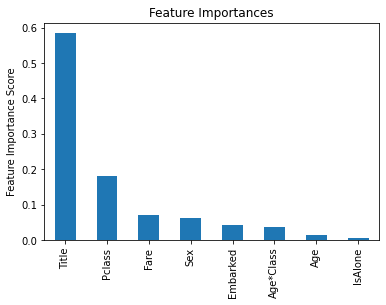

In [73]:
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, X_train,y_train)

In [74]:
gbm0 = GradientBoostingClassifier(random_state=10)
model_and_predictions_dictionary,performances = Classifier_train_modelCV(gbm0, X_train,y_train)
performances

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,GradientBoostingClassifier(random_state=10),0.79,0.68,0.73,0.8632,0.83,2.470927


In [77]:
param_test1 = {'n_estimators':range(20,81,10)}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                min_samples_split=3,min_samples_leaf=1,max_depth=3,
                                max_features='sqrt',subsample=0.9,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  min_samples_split=3,
                                                  random_state=10,
                                                  subsample=0.9),
             n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='roc_auc')

In [79]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 80}, 0.8699669090539359)

In [80]:
As you can see that here we got 80 as the optimal estimators for 0.1 learning rate. Note that 80 is a reasonable value and can be used as it is. But it might not be the same in all cases. Other situations:

If the value is around 20, you might want to try lowering the learning rate to 0.05 and re-run grid search
If the values are too high ~100, tuning the other parameters will take long time and you can try a higher learning rate

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [75]:
gbm0.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 10,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Choose a relatively high learning rate. Generally the default value of 0.1 works but somewhere between 0.05 to 0.2 should work for different problems
Determine the optimum number of trees for this learning rate. This should range around 40-70. Remember to choose a value on which your system can work fairly fast. This is because it will be used for testing various scenarios and determining the tree parameters.
Tune tree-specific parameters for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
Lower the learning rate and increase the estimators proportionally to get more robust models.


min_samples_split = 500 : This should be ~0.5-1% of total values. Since this is imbalanced class problem, we’ll take a small value from the range.
min_samples_leaf = 50 : Can be selected based on intuition. This is just used for preventing overfitting and again a small value because of imbalanced classes.
max_depth = 8 : Should be chosen (5-8) based on the number of observations and predictors. This has 87K rows and 49 columns so lets take 8 here.
max_features = ‘sqrt’ : Its a general thumb-rule to start with square root.
subsample = 0.8 : This is a commonly used used start value

In [92]:
#Tuning tree-specific parameters
param_test2 = {'max_depth':range(3,13,2), 'min_samples_split':range(2,11,2)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=80,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(3, 13, 2),
                         'min_samples_split': range(2, 11, 2)},
             scoring='roc_auc')

In [93]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 3, 'min_samples_split': 10}, 0.8704239217534931)

In [100]:
pd.DataFrame(gsearch2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.484975,0.015974,0.018598,4.079416e-03,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.851515,0.837968,0.884492,0.853743,0.908057,0.867155,0.025495,6
1,0.487374,0.026438,0.015399,4.317136e-03,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.852964,0.843583,0.884492,0.854144,0.909919,0.869021,0.024650,3
2,0.413178,0.044717,0.013199,3.998996e-04,3,6,"{'max_depth': 3, 'min_samples_split': 6}",0.857181,0.842513,0.882888,0.854545,0.908589,0.869143,0.023708,2
3,0.378979,0.009879,0.013599,7.998348e-04,3,8,"{'max_depth': 3, 'min_samples_split': 8}",0.856390,0.841845,0.884225,0.854813,0.907526,0.868960,0.023722,4
4,0.421977,0.029991,0.015799,2.039731e-03,3,10,"{'max_depth': 3, 'min_samples_split': 10}",0.857971,0.843048,0.885160,0.856952,0.908988,0.870424,0.023624,1
5,0.871153,0.028130,0.018199,4.261084e-03,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.844928,0.833556,0.873262,0.850936,0.910717,0.862680,0.027279,10
6,0.826556,0.022158,0.014799,2.637397e-03,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.842951,0.834492,0.878209,0.851738,0.913642,0.864206,0.028741,9
7,0.808357,0.012626,0.018599,3.773721e-03,5,6,"{'max_depth': 5, 'min_samples_split': 6}",0.847167,0.840374,0.883155,0.857754,0.916301,0.868950,0.027786,5
8,0.772958,0.018813,0.015599,1.496771e-03,5,8,"{'max_depth': 5, 'min_samples_split': 8}",0.848090,0.838904,0.887433,0.851471,0.909653,0.867110,0.026925,7
9,0.733361,0.028217,0.018999,4.774628e-03,5,10,"{'max_depth': 5, 'min_samples_split': 10}",0.845059,0.836765,0.877540,0.853743,0.910717,0.864765,0.026715,8


In [81]:
[i for i in range(200,1001,200)]

[200, 400, 600, 800, 1000]

In [82]:
[i for i in range(2,11,2)]

[2, 4, 6, 8, 10]

In [84]:
[i for i in range(3,13,2)]

[3, 5, 7, 9, 11]

In [83]:
[i for i in range(5,16,2)]

[5, 7, 9, 11, 13, 15]

In [62]:
import xgboost

In [ ]:
xgboost.

In [101]:
param_test3 = {'min_samples_split':range(10,21,2), 'min_samples_leaf':range(3,16,2)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=3,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=80,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'min_samples_leaf': range(3, 16, 2),
                         'min_samples_split': range(10, 21, 2)},
             scoring='roc_auc')

In [103]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 5, 'min_samples_split': 10}, 0.871601903262665)


Model Report
Accuracy : 0.844
AUC Score (Train): 0.896630
CV Score : Mean - 0.8716019 | Std - 0.02255163 | Min - 0.8395722 | Max - 0.906196


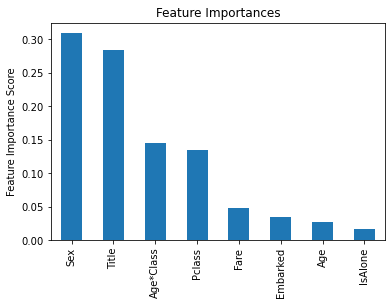

In [104]:
modelfit(gsearch3.best_estimator_,X_train,y_train)

In [105]:

model_and_predictions_dictionary,performances = Classifier_train_modelCV(gsearch3.best_estimator_, X_train,y_train)
performances

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,GradientBoostingClassifier(max_features='sqrt'...,0.82,0.65,0.73,0.8628,0.84,2.174879


If you compare the feature importance of this model with the baseline model, you’ll find that now we are able to derive value from many more variables. Also, earlier it placed too much importance on some variables but now it has been fairly distributed.

In [106]:
param_test4 = {'max_features':range(2,9,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80,max_depth=3, min_samples_split=10, min_samples_leaf=5, subsample=0.9, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 8}, 0.8729256975299821)

In [ ]:
Tuning subsample and making models with lower learning rate
The next step would be try different subsample values. Lets take values 0.6,0.7,0.75,0.8,0.85,0.9.

In [107]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,max_features= 8, n_estimators=80,max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=10),
param_grid = param_test5, scoring='roc_auc',n_jobs=4, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.best_params_, gsearch5.best_score_

({'subsample': 0.6}, 0.8758419562479958)

In [ ]:
Here, we found 0.85 as the optimum value. Finally, we have all the parameters needed. Now, we need to lower the learning rate and increase the number of estimators proportionally. Note that these trees might not be the most optimum values but a good benchmark.

As trees increase, it will become increasingly computationally expensive to perform CV and find the optimum values. For you to get some idea of the model performance, I have included the private leaderboard scores for each. Since the data is not open, you won’t be able to replicate that but it’ll good for understanding.

Lets decrease the learning rate to half, i.e. 0.05 with twice (120) the number of trees.


Model Report
Accuracy : 0.8418
AUC Score (Train): 0.904539
CV Score : Mean - 0.8744397 | Std - 0.0277915 | Min - 0.8359626 | Max - 0.9177636


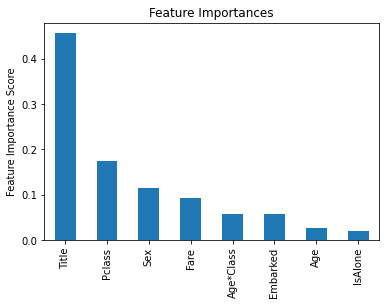

In [108]:

gbm_tuned_1 = GradientBoostingClassifier(subsample= 0.6,learning_rate=0.05,max_features= 8, n_estimators=160,max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=10)
modelfit(gbm_tuned_1, X_train, y_train)

In [109]:

model_and_predictions_dictionary,performances = Classifier_train_modelCV(gbm_tuned_1, X_train,y_train)
performances

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,"GradientBoostingClassifier(learning_rate=0.05,...",0.8,0.67,0.73,0.863,0.83,4.175779


In [ ]:
#GradientBoostingClassifier(random_state=10)	0.79	0.68	0.73	0.8632	0.83	2.470927

In [ ]:
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [110]:
gbm_tuned_1

GradientBoostingClassifier(learning_rate=0.05, max_features=8,
                           min_samples_leaf=5, min_samples_split=10,
                           n_estimators=160, random_state=10, subsample=0.6)

In [112]:
y_pred = gbm_tuned_1.predict(X_test)

prediction = pd.DataFrame()
prediction['PassengerId'] = id
prediction['Survived'] = y_pred
prediction.to_csv("gender submissionby gradiantboost8.csv", index =False)

In [ ]:
#saving model
import pickle
pickle.dump(gbm_tuned_1, open('titanik.pklgboost','wb'))


In [115]:
gbm_tuned_1.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.05,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': 8,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 160,
 'n_iter_no_change': None,
 'random_state': 10,
 'subsample': 0.6,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# grid search best model comparision of Xgboost and grdboost

In [118]:
#comaprimg with xgboost
md = pickle.load(open('titanik.pkl','rb'))

In [119]:
#Xboost
model_and_predictions_dictionary,performances = Classifier_train_modelCV(md, X_train,y_train)
performances

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.81,0.66,0.73,0.8578,0.83,3.00084


In [121]:
#gdboost
model_and_predictions_dictionary,performances = Classifier_train_modelCV(gbm_tuned_1, X_train,y_train)
performances

,ClassificationCV,Precision,Recall,F1score,AUC,Avarage precision,CV_execution_time
0,"GradientBoostingClassifier(learning_rate=0.05,...",0.8,0.67,0.73,0.863,0.83,4.669809



Model Report
Accuracy : 0.8339
AUC Score (Train): 0.899410
CV Score : Mean - 0.8767783 | Std - 0.03040624 | Min - 0.8375668 | Max - 0.9252094


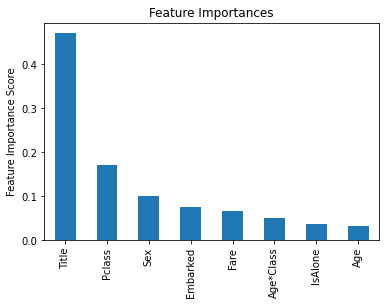

In [120]:
#xgboost
modelfit(md, X_train, y_train)


Model Report
Accuracy : 0.8418
AUC Score (Train): 0.904539
CV Score : Mean - 0.8744397 | Std - 0.0277915 | Min - 0.8359626 | Max - 0.9177636


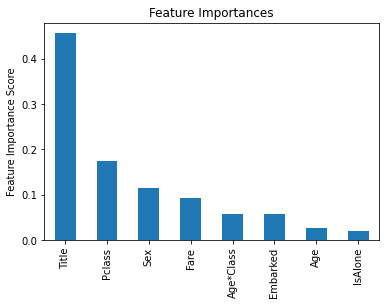

In [122]:
#gdboost
modelfit(gbm_tuned_1, X_train, y_train)

# Stacking

In [7]:
test = X_test.copy()
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [9]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3


#In the section of code below, we essentially write a class SklearnHelper that allows one to extend the inbuilt methods (such as train, predict and fit) common to all the Sklearn classifiers

In [10]:
test = X_test.copy()

In [31]:
# Some useful parameters which will come in handy later on
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction

kf = KFold(n_splits=5,shuffle=True, random_state=SEED)
sf = kf.split(train)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    
# Class to extend XGboost classifer

# out of fold prediction

In [23]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(sf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

# Generating our Base First-Level Models
So now let us prepare five learning models as our first level classification. These models can all be conveniently invoked via the Sklearn library and are listed as follows:

Random Forest classifier
Extra Trees classifier
AdaBoost classifer
Gradient Boosting classifer
Support Vector Machine

In [13]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier,RandomForestClassifier

In [14]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [15]:
# Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

Creating NumPy arrays out of our train and test sets

In [19]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
y_train = train['Survived'].ravel()
train = train.drop(['Survived'], axis=1)
x_train = train.values # Creates an array of the train data
x_test = test.values # Creats an array of the test data

Output of the First level Predictions

We now feed the training and test data into our 5 base classifiers and use the Out-of-Fold prediction function we defined earlier to generate our first level predictions. Allow a handful of minutes for the chunk of code below to run.

In [24]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

print("Training is complete")

Training is complete


In [94]:
ada_oof_train

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

Feature importances generated from the different classifiers

In [25]:
rf_feature = rf.feature_importances(x_train,y_train)
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train,y_train)

[0.15035802 0.28391158 0.03839726 0.0805233  0.03980221 0.29243151
 0.02389708 0.09067904]
[0.1685263  0.39519691 0.03276688 0.07878794 0.03948295 0.19416551
 0.03260679 0.05846672]
[0.12  0.09  0.14  0.048 0.026 0.176 0.012 0.388]
[0.16957856 0.02308634 0.03110705 0.10029225 0.03482182 0.57859172
 0.02097261 0.04154966]


In [40]:
rf_feature = list(rf.fit(x_train,y_train).feature_importances_)
et_feature = list(et.fit(x_train, y_train).feature_importances_)
ada_feature = list(ada.fit(x_train, y_train).feature_importances_)
gb_feature = list(gb.fit(x_train,y_train).feature_importances_)

In [42]:
rf_feature

[0.15035801773398003,
 0.283911580641833,
 0.0383972638669469,
 0.08052329883579731,
 0.039802211266333244,
 0.29243150701389153,
 0.023897078384176998,
 0.09067904225704097]

In [43]:
cols = train.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_feature,
     'Extra Trees  feature importances': et_feature,
      'AdaBoost feature importances': ada_feature,
    'Gradient Boost feature importances': gb_feature
    })

In [47]:
feature_dataframe

,features,Random Forest feature importances,Extra Trees feature importances,AdaBoost feature importances,Gradient Boost feature importances
0,Pclass,0.150358,0.168526,0.120,0.169579
1,Sex,0.283912,0.395197,0.090,0.023086
2,Age,0.038397,0.032767,0.140,0.031107
3,Fare,0.080523,0.078788,0.048,0.100292
4,Embarked,0.039802,0.039483,0.026,0.034822
5,Title,0.292432,0.194166,0.176,0.578592
6,IsAlone,0.023897,0.032607,0.012,0.020973
7,Age*Class,0.090679,0.058467,0.388,0.041550


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')


<AxesSubplot:xlabel='features', ylabel='Random Forest feature importances'>

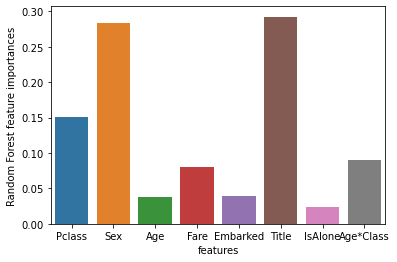

In [67]:
sns.barplot(x ='features',y='Random Forest feature importances', data = feature_dataframe)

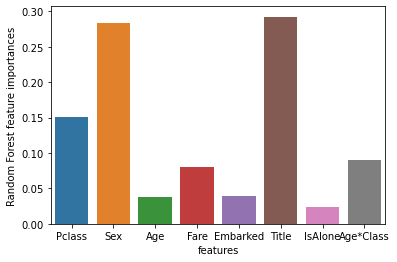

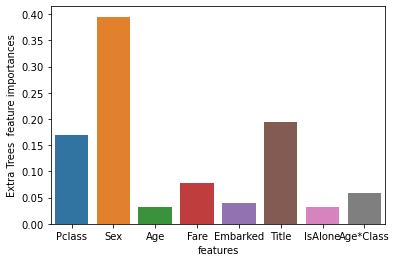

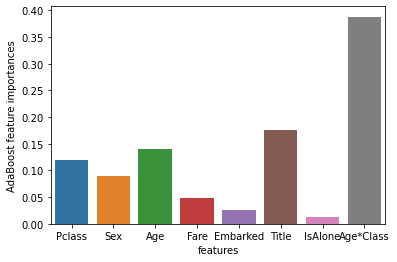

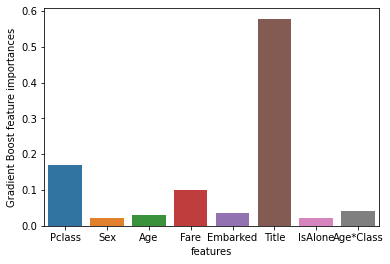

In [69]:
for i in feature_dataframe.columns[1:]:
    sns.barplot(x ='features',y= i, data = feature_dataframe)
    plt.show()

In [65]:
feature_dataframe.columns[1:]

Index(['Random Forest feature importances', 'Extra Trees  feature importances',
       'AdaBoost feature importances', 'Gradient Boost feature importances'],
      dtype='object')

In [70]:
# Create the new column containing the average of values

feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

,features,Random Forest feature importances,Extra Trees feature importances,AdaBoost feature importances,Gradient Boost feature importances,mean
0,Pclass,0.150358,0.168526,0.12,0.169579,0.152116
1,Sex,0.283912,0.395197,0.09,0.023086,0.198049
2,Age,0.038397,0.032767,0.14,0.031107,0.060568


<AxesSubplot:xlabel='features', ylabel='mean'>

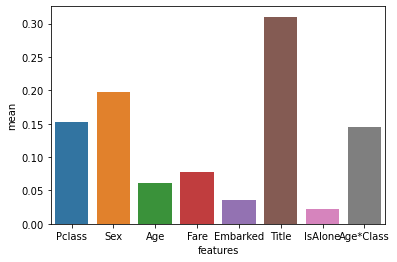

In [71]:
sns.barplot(x ='features',y='mean', data = feature_dataframe)

In [89]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
      'GradientBoost': gb_oof_train.ravel()
    })
base_predictions_train.head()

,RandomForest,ExtraTrees,AdaBoost,GradientBoost
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [92]:
base_predictions_train.head(50)

,RandomForest,ExtraTrees,AdaBoost,GradientBoost
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0


In [90]:
base_predictions_train.corr()

,RandomForest,ExtraTrees,AdaBoost,GradientBoost
RandomForest,NaN,NaN,NaN,NaN
ExtraTrees,NaN,1.0,NaN,NaN
AdaBoost,NaN,NaN,NaN,NaN
GradientBoost,NaN,NaN,NaN,NaN


In [81]:
import plotly.offline as py
data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

In [102]:
rf_oof_test

array([[-3.69773699e+166],
       [ 3.44822628e-312],
       [ 1.72406551e-312],
       [ 9.71932688e+097],
       [ 8.00000000e-001],
       [ 1.72406551e-312],
       [-2.01402861e+021],
       [ 1.72406542e-312],
       [ 8.00000000e-001],
       [ 2.00727424e-022],
       [ 1.72406526e-312],
       [ 2.00000000e-001],
       [ 8.00000000e-001],
       [ 1.72406529e-312],
       [ 8.00000000e-001],
       [ 1.04452440e+062],
       [ 1.72411453e-312],
       [ 1.72406468e-312],
       [ 1.62269340e-050],
       [ 6.00000000e-001],
       [ 1.72406595e-312],
       [-3.53978600e+158],
       [ 8.00000000e-001],
       [ 2.00000000e-001],
       [ 9.60493101e+170],
       [ 1.72406591e-312],
       [ 8.00000000e-001],
       [-1.61758508e+180],
       [ 2.00000000e-001],
       [ 1.72406595e-312],
       [ 4.49925198e+045],
       [ 1.72411806e-312],
       [ 1.72411806e-312],
       [-5.45619964e+251],
       [ 2.00000000e-001],
       [ 1.72411806e-312],
       [ 2.00000000e-001],
 

In [95]:
x_train = np.concatenate(( et_oof_train, rf_oof_train, ada_oof_train, gb_oof_train, svc_oof_train), axis=1)
x_test = np.concatenate(( et_oof_test, rf_oof_test, ada_oof_test, gb_oof_test, svc_oof_test), axis=1)

In [103]:
x_test

array([[-3.69773699e+166, -3.69773699e+166, -3.69773699e+166,
        -3.69773699e+166, -3.69773699e+166],
       [ 1.72406552e-312,  3.44822628e-312,  3.44822628e-312,
         3.44822628e-312,  3.44822628e-312],
       [ 1.72406551e-312,  1.72406551e-312,  1.72406551e-312,
         1.72406551e-312,  1.72406551e-312],
       ...,
       [ 1.72412426e-312,  1.72412426e-312,  1.72412426e-312,
         1.72412426e-312,  1.72412426e-312],
       [ 1.72412428e-312,  1.72412428e-312,  1.72412428e-312,
         1.72412428e-312,  1.72412428e-312],
       [ 6.00000000e-001,  6.00000000e-001,  6.00000000e-001,
         6.00000000e-001,  6.00000000e-001]])

In [99]:
import xgboost as xgb
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)

In [100]:
predictions

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [105]:

id


0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [106]:
# Generate Submission File 
StackingSubmission = pd.DataFrame({ 'PassengerId': id,
                            'Survived': predictions })
StackingSubmission.to_csv("StackingSubmissionstackking.csv", index=False)

# stacking with the help of sklearn

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gd = GradientBoostingClassifier(learning_rate=0.05, max_features=8,
                           min_samples_leaf=5, min_samples_split=10,
                           n_estimators=160, random_state=10, subsample=0.6)
lg = LogisticRegression(C = 21.54434690031882, penalty ='l2', solver = 'saga',random_state= 42)                   
rf = sklearn.ensemble.RandomForestClassifier(bootstrap=True,
 max_depth= 70,
 max_features= 2,
 min_samples_leaf= 3,
 min_samples_split=7,
 n_estimators=100,random_state=42)

sv = SVC(C=1.0, degree= 2, gamma='scale', kernel='rbf')


xb = xgboost.XGBClassifier(colsample_bytree= 1.0, gamma=2, learning_rate= 0.3, max_depth= 3, min_child_weight= 1, n_estimators=100, subsample=0.8,random_state=42)

In [19]:
from sklearn.ensemble import StackingClassifier,S

In [26]:
estimators = [
    ('lg', lg),
    ('gd', gd),
    ('rf', rf),
    ('sv', make_pipeline(StandardScaler(),sv)),
    
]
clf = StackingClassifier( estimators=estimators, final_estimator=xg)
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('lg',
                                LogisticRegression(C=21.54434690031882,
                                                   random_state=42,
                                                   solver='saga')),
                               ('gd',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_features=8,
                                                           min_samples_leaf=5,
                                                           min_samples_split=10,
                                                           n_estimators=160,
                                                           random_state=10,
                                                           subsample=0.6)),
                               ('rf',
                                RandomForestClassifier(max_depth=70,
                                                       max_features=2,
                                                       min_samples_leaf=3,
                                                       min_sample...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.3,
                                                 max_bin=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=3, max_leaves=None,
                                                 min_child_weight=1,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=42,
                                                 reg_alpha=None,
                                                 reg_lambda=None, ...))

In [43]:
estimators = [
    ('lg', lg),
    ('xb', xb),
    ('rf', rf),
   
    
]
clf = StackingClassifier( estimators=estimators, final_estimator=gd)
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('lg',
                                LogisticRegression(C=21.54434690031882,
                                                   random_state=42,
                                                   solver='saga')),
                               ('xb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=1.0,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=2,
                                              gpu_id=None, grow_policy=None,
                                              import...
                                              num_parallel_tree=None,
                                              predictor=None, random_state=42,
                                              reg_alpha=None, reg_lambda=None, ...)),
                               ('rf',
                                RandomForestClassifier(max_depth=70,
                                                       max_features=2,
                                                       min_samples_leaf=3,
                                                       min_samples_split=7,
                                                       random_state=42))],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                              max_features=8,
                                                              min_samples_leaf=5,
                                                              min_samples_split=10,
                                                              n_estimators=160,
                                                              random_state=10,
                                                              subsample=0.6))

In [44]:
clf.score(X_train,y_train)

0.8170594837261503

In [45]:

y_pred = clf.predict(X_test)
prediction = pd.DataFrame()
prediction['PassengerId'] = id
prediction['Survived'] = y_pred
prediction.to_csv("gender submissionstacking.csv", index =False)

In [32]:
prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
